# Neural Networks

In [6]:
import numpy as np
from scipy.stats import truncnorm

input_nodes = 3
hidden_nodes = 4
output_nodes = 2

# Truncated normal distribution parameters
mean = 0
sd = 1
low = -2
upp = 2

# Initialize input to hidden weights
wih = truncnorm((low - mean) / sd, (upp - mean) / sd).rvs((hidden_nodes, input_nodes))

# Initialize hidden to output weights
who = truncnorm((low - mean) / sd, (upp - mean) / sd).rvs((output_nodes, hidden_nodes))

print("Input to Hidden Weights: \n", wih)
print()
print("Hidden to Output Weights: \n", who)

Input to Hidden Weights: 
 [[ 0.08005081  0.08486845 -0.72535541]
 [ 0.15232666  0.34528325 -1.07859335]
 [ 0.86802897 -1.26532246  1.58955229]
 [ 1.26855624  0.11144716  0.32902287]]

Hidden to Output Weights: 
 [[-0.64069165 -0.39277357 -0.13934835  0.99148128]
 [ 0.16690903 -0.3098933  -0.45575973 -0.4476886 ]]


# MLP Classifier

In [7]:
from sklearn.neural_network import MLPClassifier

X = [[0., 0.], [0., 1.], [1., 0.], [1., 1.]]
y = [0, 0, 0, 1]

clf = MLPClassifier(solver="adam", alpha=1e-5,
                    hidden_layer_sizes=(5, 2),
                    random_state=1)

print(clf.fit(X, y))
print(clf.coefs_[0])
print("\nweights between first hidden and second hidden layer: ")
print(clf.coefs_[1])

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1)
[[-0.02896066  0.27747106 -0.73827919 -0.52804456 -0.47211108]
 [-0.57042845 -0.77491524 -0.12764227 -0.34924161  0.00092499]]

weights between first hidden and second hidden layer: 
[[ 0.15339756 -0.02866374]
 [ 0.30293892 -0.4835794 ]
 [-0.38016099  0.37810687]
 [ 1.05575587 -0.17994371]
 [ 0.18954492  0.5138406 ]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Load Dataset

In [17]:
from sklearn.datasets import load_digits
digits = load_digits()
n_samples, n_features = digits.data.shape
print((n_samples, n_features))

(1797, 64)


### Show Data

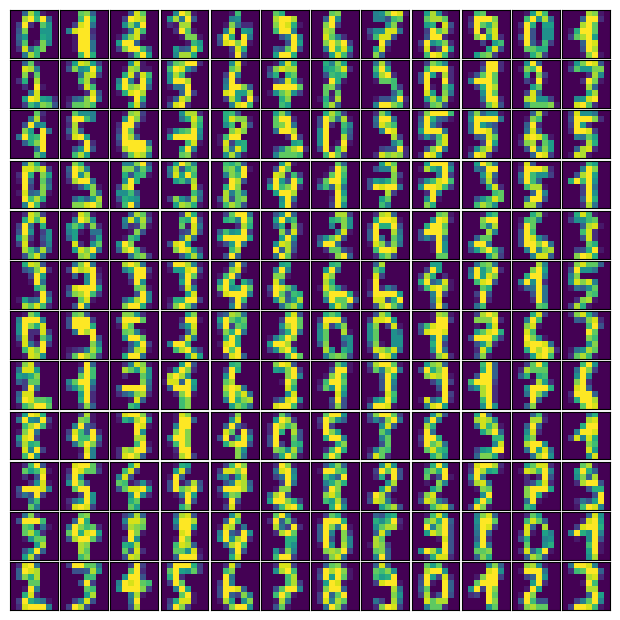

In [20]:
import matplotlib.pyplot as plt
# Setup the figure
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1,
                    bottom=0, top=1,
                    hspace=0.05, wspace=0.05)
# Plot the digits
for i in range(144):
  ax = fig.add_subplot(12, 12, i+1, xticks=[], yticks=[])
  ax.imshow(digits.images[i])

### Perform 80-20 % split

In [21]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(digits.data,
                                                                    digits.target,
                                                                    train_size=0.8,
                                                                    test_size=0.2,
                                                                    random_state=1)

### Network

In [36]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(5,),
                    activation = "logistic",
                    alpha = 1e-4,
                    solver = "sgd",
                    tol = 1e-4,
                    random_state = 1,
                    learning_rate_init = .3,
                    verbose = True)
mlp.fit(train_data, train_labels)

Iteration 1, loss = 2.25145782
Iteration 2, loss = 1.97730357
Iteration 3, loss = 1.66620880
Iteration 4, loss = 1.41353830
Iteration 5, loss = 1.29575643
Iteration 6, loss = 1.06663583
Iteration 7, loss = 0.95476869
Iteration 8, loss = 0.98840135
Iteration 9, loss = 0.85124323
Iteration 10, loss = 0.75499271
Iteration 11, loss = 0.80608405
Iteration 12, loss = 0.72358116
Iteration 13, loss = 0.68370817
Iteration 14, loss = 0.78455371
Iteration 15, loss = 0.71477343
Iteration 16, loss = 0.66806356
Iteration 17, loss = 0.81050074
Iteration 18, loss = 0.68337671
Iteration 19, loss = 0.74931776
Iteration 20, loss = 0.66185255
Iteration 21, loss = 0.77614665
Iteration 22, loss = 0.69448062
Iteration 23, loss = 0.70176765
Iteration 24, loss = 0.76440970
Iteration 25, loss = 0.70033401
Iteration 26, loss = 0.65138383
Iteration 27, loss = 0.59872788
Iteration 28, loss = 0.57207818
Iteration 29, loss = 0.62176226
Iteration 30, loss = 0.58669984
Iteration 31, loss = 0.54031128
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(5,),
              learning_rate_init=0.3, random_state=1, solver='sgd',
              verbose=True)

### Accuracy on training and test data

In [37]:
from sklearn.metrics import accuracy_score

predictions_train = mlp.predict(train_data)
print("Accuracy on train data: ", accuracy_score(predictions_train, train_labels))

predictions_test = mlp.predict(test_data)
print("Accuracy on test data: ", accuracy_score(predictions_test, test_labels))

Accuracy on train data:  0.8740431454418929
Accuracy on test data:  0.8194444444444444


### Confusion tables on training and test data

In [38]:
from sklearn.metrics import confusion_matrix

c1 = confusion_matrix(predictions_train, train_labels)
c2 = confusion_matrix(predictions_test, test_labels)

print("Confusion Matrix 1 = \n", c1 )
print()
print("Confusion Matrix 2 = \n", c2)

Confusion Matrix 1 = 
 [[130   0   0   0   0   2   0   0   0   0]
 [  0 121   0   4  20   0   5  14  20   2]
 [  0   0 131   4   0   0   1   0   0   0]
 [  0   1   4 126   0   0   0   2   5   2]
 [  0   0   0   0 118   1   0   1   2   3]
 [  0   1   0   0   4 143   6   1   0   0]
 [  0  17   0   0   0   3 132   0   0   0]
 [  0   6   0   0   1   1   0 123   0  23]
 [  0   1   4   0   0   0   0   0 117   1]
 [  5   0   2   8   0   2   0   1   1 115]]

Confusion Matrix 2 = 
 [[39  0  0  0  0  0  0  0  0  1]
 [ 0 25  0  2  3  3  2  4  4  0]
 [ 0  0 29  2  0  1  0  0  0  0]
 [ 0  0  2 35  0  0  0  0  0  1]
 [ 2  0  0  0 34  1  0  0  0  1]
 [ 0  0  0  0  1 22  1  0  0  1]
 [ 0  7  0  0  0  2 34  0  0  0]
 [ 0  2  0  0  0  1  0 33  2  7]
 [ 0  1  3  0  0  0  0  0 22  1]
 [ 2  0  2  2  0  0  0  0  1 22]]


### Classification Report

In [39]:
from sklearn.metrics import classification_report

print(classification_report(predictions_test, test_labels))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        40
           1       0.71      0.58      0.64        43
           2       0.81      0.91      0.85        32
           3       0.85      0.92      0.89        38
           4       0.89      0.89      0.89        38
           5       0.73      0.88      0.80        25
           6       0.92      0.79      0.85        43
           7       0.89      0.73      0.80        45
           8       0.76      0.81      0.79        27
           9       0.65      0.76      0.70        29

    accuracy                           0.82       360
   macro avg       0.81      0.83      0.82       360
weighted avg       0.82      0.82      0.82       360

